# Modelling Empirical Distributions with Histogram amd KDE
We examine KDE and histograms over the  [House prices dataset (Kaggle)](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) <br> 



### 0. Imports

In [1]:
#data processing
import pandas as pd
import numpy as np
import scipy as sp

#statistics
from scipy import stats
import statsmodels.api as sm


#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline
#%matplotlib widget

#Machine learning library
import sklearn

import warnings
warnings.filterwarnings("ignore")


##### Loading the CSV dataset

In [2]:
dataset_path = "../datasets/houseprices/train.csv"
dtf = pd.read_csv(dataset_path,index_col='Id')

In [3]:
dtf.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


##### Defining numeric and categorical columns

In [4]:
numeric_columns = dtf.dtypes[(dtf.dtypes=="float64") | (dtf.dtypes=="int64")].index.tolist()
very_numerical = [nc for nc in numeric_columns if dtf[nc].nunique()>20]
categorical_columns = [c for c in dtf.columns if c not in numeric_columns]

##### Filling Null Values with the column's mean

In [5]:
na_columns = dtf[very_numerical].isna().sum()
na_columns = na_columns[na_columns>0]
na_columns

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [6]:
for nc in na_columns.index:
    dtf[nc].fillna(dtf[nc].mean(),inplace=True)

## 1. Histogram

##### Pandas builtin histogram

<AxesSubplot:>

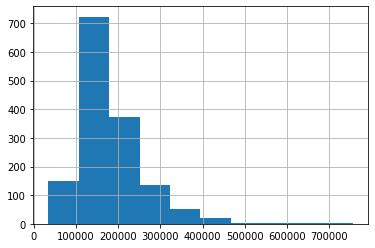

In [7]:
dtf.SalePrice.hist(bins=10)

##### Seaborn histogram is more flexible

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

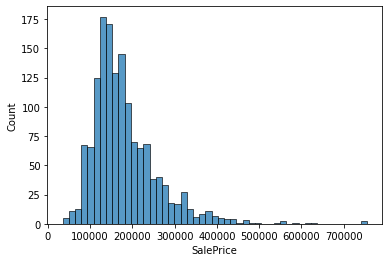

In [8]:
sns.histplot(data=dtf.SalePrice)

##### We can see that it estimates the number of bins to use

<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

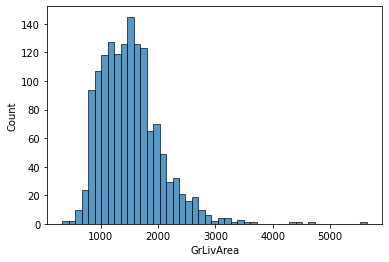

In [9]:
sns.histplot(data=dtf.GrLivArea)

### Types of histograms

##### We can choose between several types of histograms in Seaborn:

* count: show the number of observations in each bin

* frequency: show the number of observations divided by the bin width

* probability: or proportion: normalize such that bar heights sum to 1

* percent: normalize such that bar heights sum to 100

* density: normalize such that the total area of the histogram equals 1

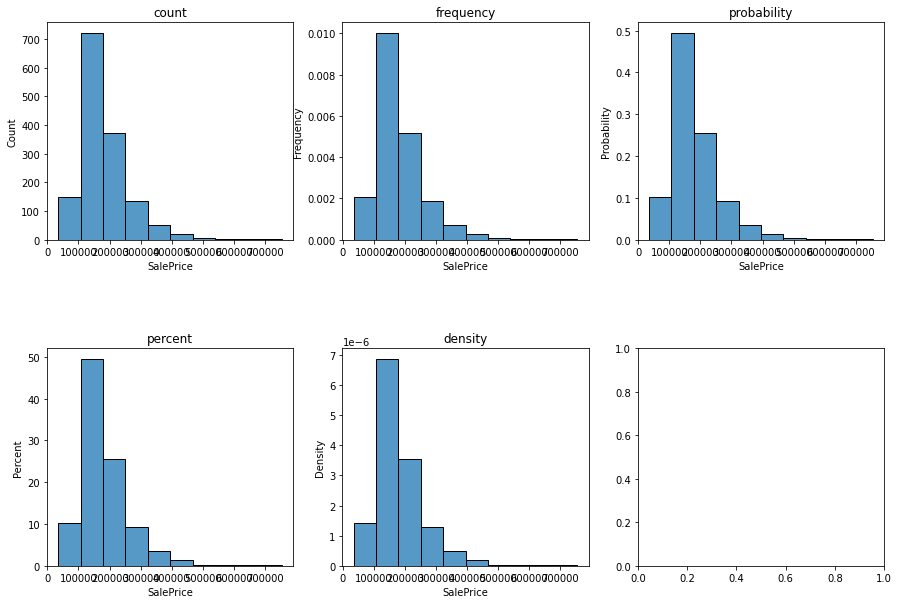

In [10]:
%matplotlib inline
types = ['count','frequency','probability','percent','density']

n=len(types)
cols = 3
rows=(n//3) + 1 if n%3 !=0 else n//3

fig, axes = plt.subplots(rows,cols,figsize=(cols*5,rows*5))
fig.subplots_adjust(hspace=0.5)

for i, typ in enumerate(types):
    #calculate the current place on the grid
    r=int(i/cols)
    c=i%cols
    # build the histograms
    #dtf[column].hist(ax=axes[r,c],kde=True)
    sns.histplot(data=dtf.SalePrice,stat=typ,ax=axes[r,c],bins=10)
    axes[r,c].set_title(typ)

### Types of Reference Rules

Seaborn uses [numpy.histogram_bin_edges](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html) to set the bin edges (i.e., the bin width / number of bins)

These are the allowed options:
* 'auto'
            Maximum of the 'sturges' and 'fd' estimators. Provides good
            all around performance.
* 'fd' (Freedman Diaconis Estimator)
            Robust (resilient to outliers) estimator that takes into
            account data variability and data size.
* 'doane'
            An improved version of Sturges' estimator that works better
            with non-normal datasets.
*  'scott'
            Less robust estimator that that takes into account data
            variability and data size.
* 'stone'
            Estimator based on leave-one-out cross-validation estimate of
            the integrated squared error. Can be regarded as a generalization
            of Scott's rule.
*  'rice'
            Estimator does not take variability into account, only data
            size. Commonly overestimates number of bins required.
* 'sturges'
            R's default method, only accounts for data size. Only
            optimal for gaussian data and underestimates number of bins
            for large non-gaussian datasets.
* 'sqrt'
            Square root (of data size) estimator, used by Excel and
            other programs for its speed and simplicity.

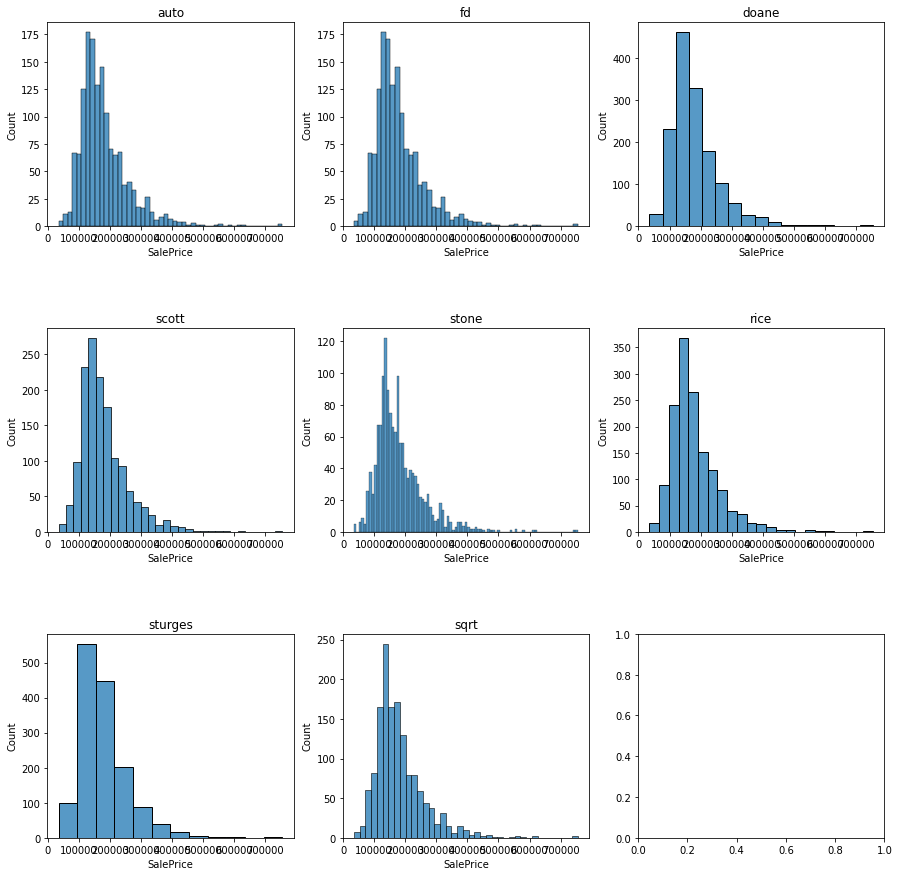

In [11]:
#%matplotlib inline
histogram_rules = ['auto','fd','doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt']
n=len(histogram_rules)
cols = 3
rows=(n//3) + 1 if n%3 !=0 else n//3

fig, axes = plt.subplots(rows,cols,figsize=(cols*5,rows*5))
fig.subplots_adjust(hspace=0.5)

for i, typ in enumerate(histogram_rules):
    #calculate the current place on the grid
    r=int(i/cols)
    c=i%cols
    # build the histograms
    #dtf[column].hist(ax=axes[r,c],kde=True)
    sns.histplot(data=dtf.SalePrice,ax=axes[r,c],bins=typ)
    axes[r,c].set_title(typ)

### Experimenting with different bin size:

In [7]:
#matplotlib notebook
%matplotlib widget

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
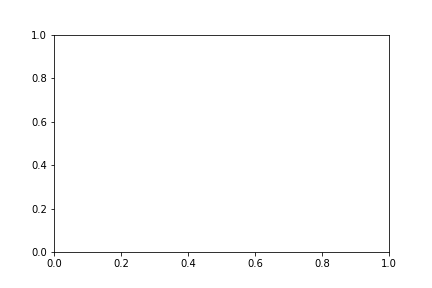

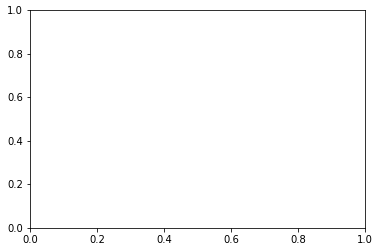

In [13]:
fig1, ax1 = plt.subplots()
def animate(frame_num):
    #print(frame_num)
    ax1.clear()
    sns.histplot(data=dtf.SalePrice,bins=frame_num+1,ax=ax1)
    ax1.set_title(f"{frame_num+1} bins")

anim = FuncAnimation(fig1, animate, frames=80, interval=200,repeat=False)
plt.show()

In [14]:
%matplotlib inline

# Kernel Density Estimation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

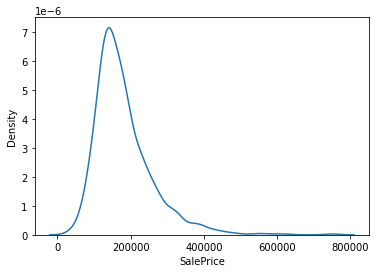

In [15]:
sns.kdeplot(dtf.SalePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

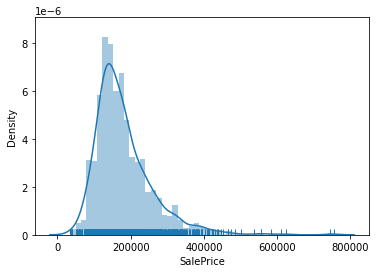

In [16]:
sns.distplot(dtf.SalePrice,rug=True)

#### The 'Clip' Parameter

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

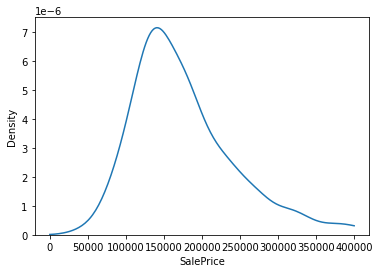

In [17]:
%matplotlib inline
sns.kdeplot(data=dtf.SalePrice,clip=(0,400000))

#### Playing with the bandwith parameter:

In [23]:
%matplotlib widget

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
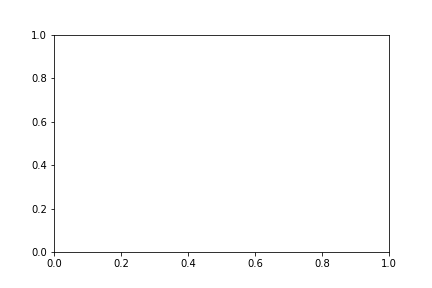

In [8]:
fig2, ax2 = plt.subplots()
def animate2(frame_num):
    ax2.clear()
    #sns.histplot(data=dtf.SalePrice,ax=ax2)
    #sns.kdeplot(data=dtf.SalePrice,ax=ax2)
    sns.distplot(dtf.SalePrice,kde_kws={'bw':frame_num/200+0.001},ax=ax2)
    ax2.set_title(f"bw = {frame_num/200}")
anim = FuncAnimation(fig2, animate2, frames=80, interval=200,repeat=False)
plt.show()

#### Reference rules for bandwith estimation:

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

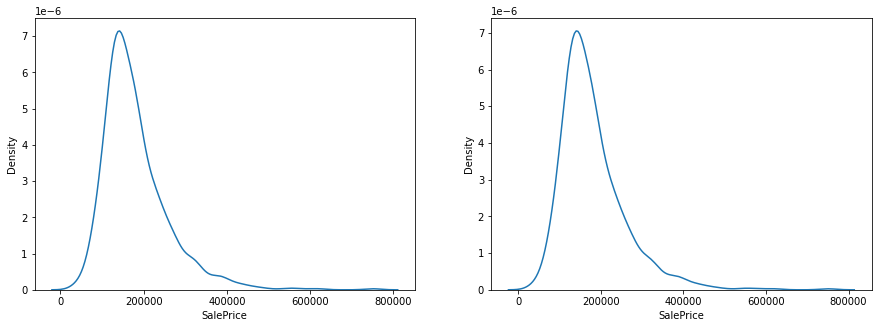

In [9]:
%matplotlib inline
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(dtf.SalePrice,bw_method='scott',ax=axes[0])
sns.kdeplot(dtf.SalePrice,bw_method='silverman',ax=axes[1])

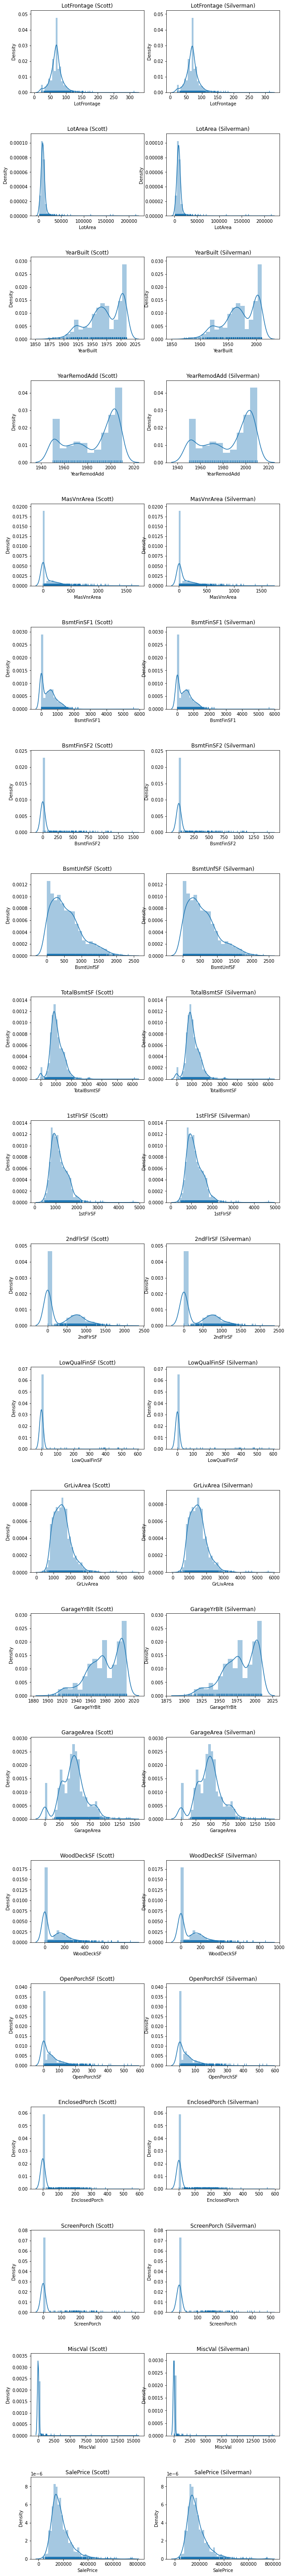

In [21]:
%matplotlib inline

n=len(very_numerical)
cols = 2
rows= n

fig, axes = plt.subplots(rows,cols,figsize=(cols*5,rows*5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(very_numerical):
    #calculate the current place on the grid
    r=i

    sns.distplot(dtf[col],kde_kws={'bw_method':'scott'},ax=axes[r,0],rug=True)
    sns.distplot(dtf[col],kde_kws={'bw_method':'silverman'},ax=axes[r,1],rug=True)
    axes[r,0].set_title(f'{col} (Scott)')
    axes[r,1].set_title(f'{col} (Silverman)')